<a href="https://colab.research.google.com/github/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from scipy.optimize import minimize
import scipy.stats as stats
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

url = 'https://github.com/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/MLE.xlsx?raw=true'
tbl = pd.read_excel(url)
tbl
model = ols(formula = "Y ~ X", data = tbl).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Sat, 21 Aug 2021   Prob (F-statistic):            0.00122
Time:                        17:13:07   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2882      0.755     -0.382      0.728      -2.692       2.115
X              1.6176      0.134     12.079      0.001       1.191       2.044
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.405
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.551
Skew:                           0.089   Prob(JB):                        0.759
Kurtosis:                       1.384   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
e = model.resid
e

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [10]:
np.std(e)

0.6048820983804833

In [11]:
def lik(parameters):
  m = parameters[0]
  b = parameters[1]
  sigma = parameters[2]
  for i in np.arange(0,len(x)):
    y_exp = m*x + b
  L = (len(x)/2 * np.log(2*np.pi) + len(x)/2 * np.log(sigma**2) + 1 / (2*sigma**2) * sum((y - y_exp) **2))
  return L

x = np.array([1,3,2,1,3])
y = np.array([14,24,18,17,27])
lik_model = minimize(lik, np.array([2,2,2]), method='Nelder-Mead')
lik_model
  


 final_simplex: (array([[ 5.00000631, 10.00000822,  1.67332132],
       [ 4.99996581, 10.00008112,  1.67332683],
       [ 4.99998382, 10.00002278,  1.67329385],
       [ 5.00001119,  9.9999767 ,  1.67334933]]), array([9.66874121, 9.66874121, 9.66874121, 9.66874121]))
           fun: 9.668741209395263
       message: 'Optimization terminated successfully.'
          nfev: 212
           nit: 118
        status: 0
       success: True
             x: array([ 5.00000631, 10.00000822,  1.67332132])

In [15]:
url1 = 'https://github.com/shallabhkhera/NPTEL-Data-Analytics-with-Python/blob/main/Simmons.xls?raw=true'
df = pd.read_excel(url1)
df

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
...,...,...,...,...
95,96,3.318,0,0
96,97,2.421,1,0
97,98,6.073,0,0
98,99,2.630,1,0


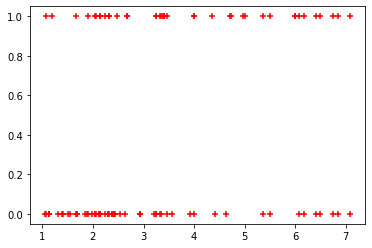

In [16]:
plt.scatter(df.Spending, df.Coupon, marker='+', color='red')

In [18]:
x = df[['Card', 'Spending']]
y = df['Coupon']
import statsmodels.api as sm

x1 = sm.add_constant(x)
logit_model = sm.Logit(y, x1)
result = logit_model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 Aug 2021   Pseudo R-squ.:                  0.1012
Time:                        17:17:33   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
Covariance Type:            nonrobust   LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.

In [19]:
from scipy.stats import chi2
chi2.pdf(13.628,2)

0.000549145469075383